## Sprint I - Asunciones

**Hecho el 25/01:** 
- comprobamos normalidad, homogeneidad y dependencia.
- hemos creado un csv nuevo con la v respuesta normalizada para hacer con ella otro anova.
- separamos ficheros de encoding y anova.

In [119]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA
from sklearn.preprocessing import StandardScaler
import math 
from sklearn.preprocessing import MinMaxScaler
import researchpy as rp
from scipy.stats import levene
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,8) 

In [153]:
df = pd.read_csv("../datos/bikes_clean2.csv", index_col= 0)
df.reset_index(drop=True, inplace=True)
df.head()

,season,temp,atemp,hum,windspeed,registered
0,winter,14.110847,18.18125,80.5833,10.749882,654
1,winter,14.902598,17.68695,69.6087,16.652113,670
2,winter,8.050924,9.47025,43.7273,16.636703,1229
3,spring,8.200000,10.60610,59.0435,10.739832,1454
4,spring,9.305237,11.46350,43.6957,12.522300,1518


## Asunción de normalidad de nuestra variable respuesta

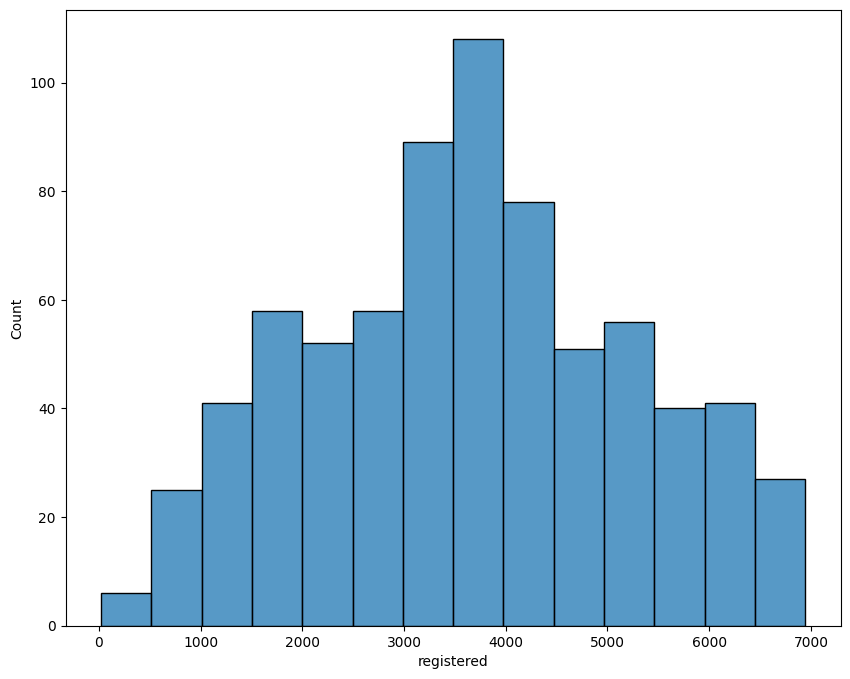

In [154]:
sns.histplot(df["registered"]) ;

In [155]:
stats.shapiro(df["registered"])

ShapiroResult(statistic=0.9843854308128357, pvalue=5.023125027037167e-07)

- Nuestro pvalor es menor a 0.05, con lo cual nuestros datos no son normales.

## Asunción de dependencia

In [156]:
num = df.select_dtypes(include=np.number).drop("registered", axis = 1)

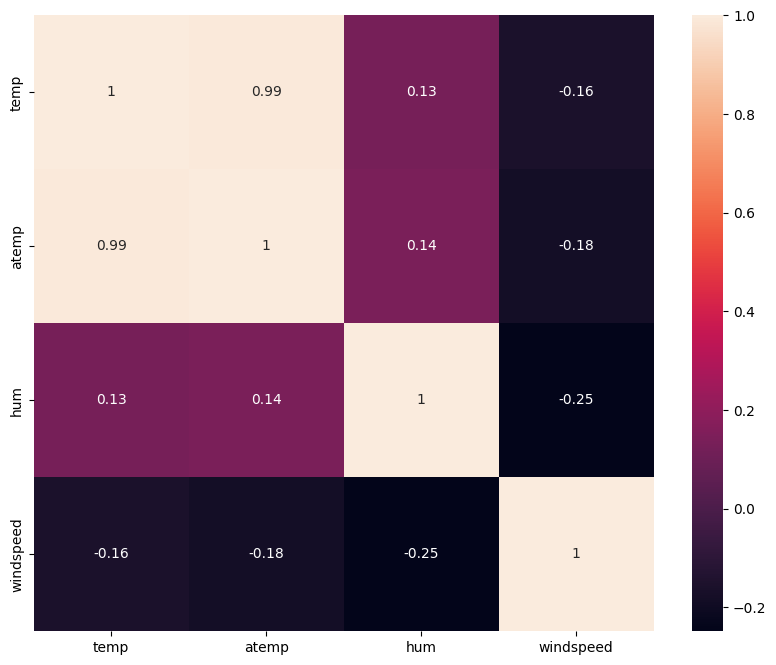

In [157]:
sns.heatmap(num.corr(), annot=True) ;

- Observamos que la columna atemp está muy relacionada con la temp, por lo que decidimos eliminarla.

In [158]:
df.drop("atemp", axis=1, inplace= True)

## Asunción de homocedasticidad / homocedasticidad

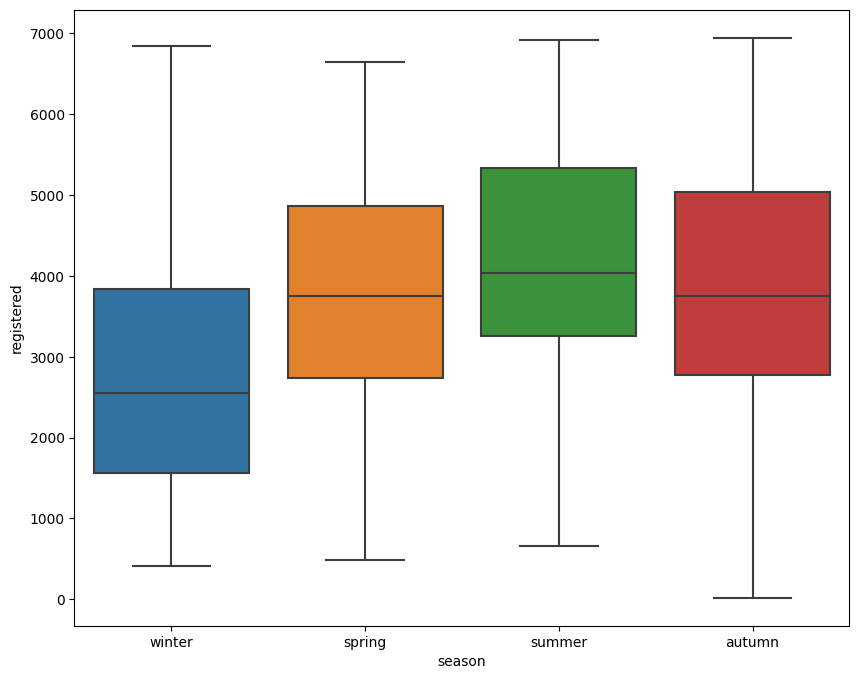

In [159]:
sns.boxplot(y= "registered", x="season", data = df) ;

- Nuestros datos son heterocedásticos, hacemos un test de levene para comprobarlo numéricamente.

In [160]:
winter = df[df["season"] == 'winter']["registered"]
spring = df[df["season"] == 'spring']["registered"]
summer = df[df["season"] == 'summer']["registered"]
autumn = df[df["season"] == 'autumn']["registered"]

In [161]:
levene_test = stats.levene(winter, spring, summer, autumn, center='median')
levene_test

LeveneResult(statistic=0.9363377313603704, pvalue=0.42259170002446245)

- Observamos que nuestros datos son mayores que 0.05, por lo que son homocedásticos. Nos quedamos con los resultados del test de Levene.

## Normalización de la variable respuesta

In [162]:
minmax = MinMaxScaler()

In [163]:
minmax.fit(df[["registered"]])

MinMaxScaler()

In [164]:
x_norm = minmax.transform(df[["registered"]])

In [165]:
x_norm.min(axis=0)

array([0.])

In [166]:
x_norm.max(axis=0)

array([1.])

In [167]:
num_minmax = pd.DataFrame(x_norm, columns=["registered_Sklearn"])

In [168]:
df["registered_Sklearn"]= num_minmax

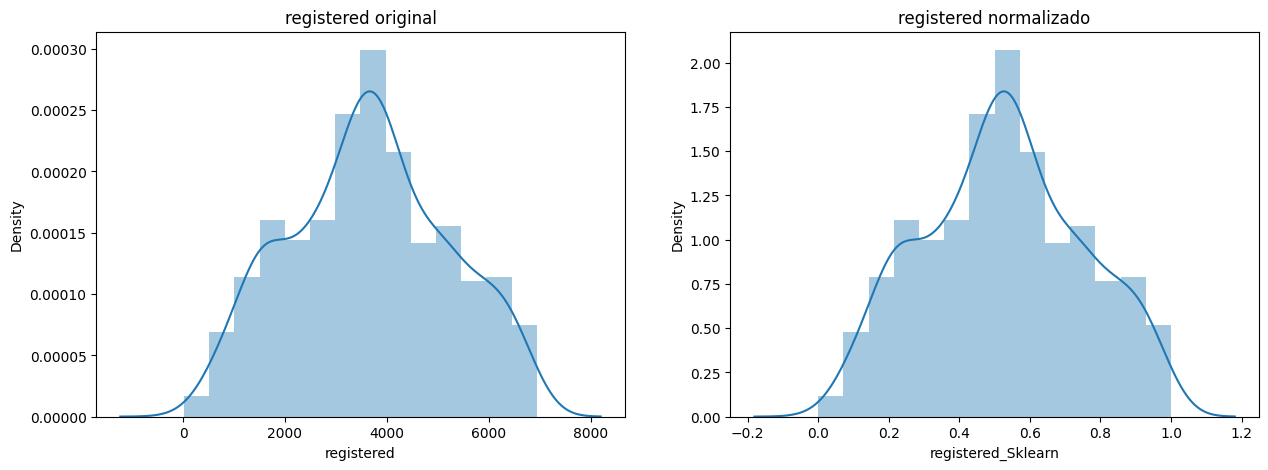

In [169]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('registered original')
axes[1].set_title('registered normalizado')

sns.distplot(df['registered'] ,ax = axes[0])
sns.distplot(df['registered_Sklearn'], ax = axes[1]);

In [170]:
stats.shapiro(df["registered_Sklearn"])

ShapiroResult(statistic=0.9843854308128357, pvalue=5.023125027037167e-07)

In [171]:
df.drop("registered", axis=1, inplace=True)

- Nuestra variable respuesta ya está normalizada.

In [172]:
#guardamos el fichero con la variable normalizada

df.to_csv("../datos/bikes_clean2_normalizado.csv")

***
## ANOVA con todas las columnas
***

In [173]:
df = pd.read_csv("../datos/bikes_clean2.csv", index_col = 0)

In [174]:
df.head(2)

,season,temp,atemp,hum,windspeed,registered
instant,,,,,,
1,winter,14.110847,18.18125,80.5833,10.749882,654
2,winter,14.902598,17.68695,69.6087,16.652113,670


sklearn entenderá los valores numéricos como **encoding**.

In [175]:
df.columns

Index(['season', 'temp', 'atemp', 'hum', 'windspeed', 'registered'], dtype='object')

In [176]:
df.isnull().sum()

season        0
temp          0
atemp         0
hum           0
windspeed     0
registered    0
dtype: int64

In [177]:
df.shape

(730, 6)

In [178]:
df.columns

Index(['season', 'temp', 'atemp', 'hum', 'windspeed', 'registered'], dtype='object')

In [179]:
lm = ols('registered ~ season + yr + mnth + holiday + workingday + weathersit + temp + atemp + hum + windspeed + casual + cnt + weekday', data=df).fit()
sm.stats.anova_lm(lm)

PatsyError: Error evaluating factor: NameError: name 'yr' is not defined
    registered ~ season + yr + mnth + holiday + workingday + weathersit + temp + atemp + hum + windspeed + casual + cnt + weekday
                          ^^

In [ ]:
len(df["registered"].unique())

678

In [ ]:
df["registered"].value_counts().sum()

730

In [ ]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             registered   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.959e+26
Date:                Wed, 25 Jan 2023   Prob (F-statistic):               0.00
Time:                        13:40:01   Log-Likelihood:                 14691.
No. Observations:                 730   AIC:                        -2.935e+04
Df Residuals:                     714   BIC:                        -2.928e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2.502e-08   1.01e-07      0.247      0.805   -1.73e-07    2.24e-07
season[T.spring]   2.26e-12   7.25e-11      0.031      0.975    -1.4e-10    1.45e-10
season[T.summer]  5.755e-13   5.68e-11      0.010      0.992   -1.11e-10    1.12e-10
season[T.winter]  4.036e-12   8.67e-11      0.047      0.963   -1.66e-10    1.74e-10
yr               -1.262e-11   5.01e-11     -0.252      0.801   -1.11e-10    8.58e-11
mnth             -1.421e-14      9e-12     -0.002      0.999   -1.77e-11    1.77e-11
holiday           2.132e-12   9.73e-11      0.022      0.983   -1.89e-10    1.93e-10
workingday       -6.661e-13   6.01e-11     -0.011      0.991   -1.19e-10    1.17e-10
weathersit        3.997e-13   4.14e-11      0.010      0.992   -8.08e-11    8.16e-11
temp             -1.399e-13   1.77e-11     -0.008      0.994    -3.5e-11    3.47e-11
atemp             3.197e-14   1.64e-11      0.002      0.998   -3.21e-11    3.22e-11
hum               1.571e-14    1.6e-12      0.010      0.992   -3.13e-12    3.16e-12
windspeed          2.27e-14   3.59e-12      0.006      0.995   -7.03e-12    7.07e-12
casual              -1.0000   3.51e-14  -2.85e+13      0.000      -1.000      -1.000
cnt                  1.0000   1.99e-14   5.02e+13      0.000       1.000       1.000
weekday           -1.83e-13   1.35e-11     -0.014      0.989   -2.66e-11    2.63e-11
==============================================================================
Omnibus:                     3899.147   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.845
Skew:                          -0.015   Prob(JB):                     6.21e-19
Kurtosis:                       1.340   Cond. No.                     3.27e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""